<a href="https://colab.research.google.com/github/hercynhcheng/PythonProject/blob/main/J2_matplotlib%E7%B9%AA%E5%9C%96%E7%B4%B0%E7%AF%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

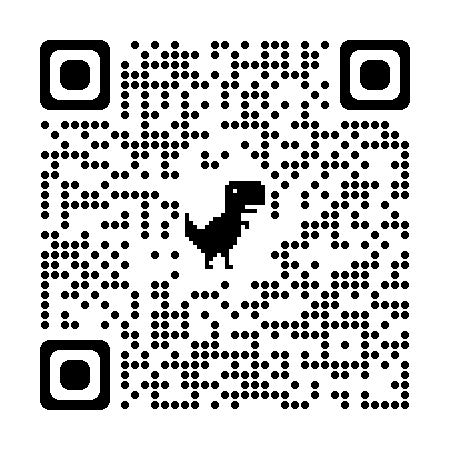

# Matplotlib資料視覺化
本程式碼可以直接執行，觀看效果，但改動本範例的語法無法保存。

因此，建議以下三種方式使用本範例：
1.   自行複製語法到自己的程式碼
2.   複製到自己的雲端空間：上方選單「檔案」「在雲端硬碟中儲存副本」
3.   下載：上方選單「檔案」「下載」「下載ipynb」



## 本範例使用到的套件
import語法習慣寫在程式碼的最上方
*   pandas：資料框架
*   matplotlib：統計圖設定
*   matplotlib.pyplot：繪製統計圖
* matplotlib.font_manager：設定字型





In [ ]:
#下載中文字型（若無需求可跳過）
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/

--2023-06-04 02:25:17--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.216.138, 173.194.216.113, 173.194.216.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gmtauo9mg1pbr80lvkgqqv6n1dea6tal/1685845500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=ccee7aed-0b2d-4265-b185-d31f94fe1e93 [following]
--2023-06-04 02:25:17--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gmtauo9mg1pbr80lvkgqqv6n1dea6tal/1685845500000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=ccee7aed-0b2d-4265-b185-d31f94fe1e93
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 173.194.218.132, 2607:f8b0:400c:c14::84
Connecting to d

In [ ]:
import pandas as pd                             #用於讀取資料集，或製作資料框架
import matplotlib.pyplot as plt                 #用於繪製統計圖

import matplotlib as mpl                        #用於設定中文字型
from matplotlib.font_manager import fontManager #用於設定中文字型

#設定中文字型（若無需求可跳過）
fontManager.addfont('/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

## Step 0 準備資料：建立資料框架（DataFrame）
以下範例使用行政院主計處「統計資料庫」：每人每月經常性薪資（醫療保健及社會工作服務業）
https://earnings.dgbas.gov.tw/query_payroll.aspx

### S0-1 定義資料框架
1.   每個欄位的資料建立一個「串列」
2.   建立一個「字典」，鍵為『欄位名稱』，值為『對應資料的串列』
3.   使用pandas.DataFrame(字典)，將字典轉換為資料框架

In [ ]:
#year = range(2011, 2022)
#male = [79682.33, 80654.58, 80160.25, 79524.33, 80239.92, 81397.83, 80690.08, 81172.41, 78025.00, 76511.33, 75922.42]
#female = [42419.58, 43267.67, 43369.47, 44581.17, 45976.25, 46513.00, 47094.83, 47278.92, 46751.25, 47268.67, 47582.75]

year = range(2011, 2023)
male = (80086, 80765, 79849, 79544, 80503, 81612, 80262, 81728, 83286, 82193, 82860, 86702)
female = (42587, 43417, 43506, 44754, 46140, 46691, 46972, 47635, 49203, 50100, 50673, 52189)

datadict = {"年份": year, "男性":male, "女性":female}

df = pd.DataFrame(datadict)
df.to_csv('sample.csv')
df

,年份,男性,女性
0,2011,80086,42587
1,2012,80765,43417
2,2013,79849,43506
3,2014,79544,44754
4,2015,80503,46140
5,2016,81612,46691
6,2017,80262,46972
7,2018,81728,47635
8,2019,83286,49203
9,2020,82193,50100


讀取資料集

In [ ]:
df = pd.read_csv('sample.csv')
df

,Unnamed: 0,年份,男性,女性
0,0,2011,80086,42587
1,1,2012,80765,43417
2,2,2013,79849,43506
3,3,2014,79544,44754
4,4,2015,80503,46140
5,5,2016,81612,46691
6,6,2017,80262,46972
7,7,2018,81728,47635
8,8,2019,83286,49203
9,9,2020,82193,50100


### S0-2 觀察資料框架
*   在cell最後一行打上變數名稱：顯示資料內容
*   DataFrame.sample(數量)：隨機選擇資料（指定數量，若省略數量為１）
*   DataFrame.head(數量)：隨機選擇資料（指定數量，若省略數量為５）
*   DataFrame.tail(數量)：隨機選擇資料（指定數量，若省略數量為５）
*   DataFrame.info()：顯示基本資訊
*   DataFrame.describe()：顯示數值型態欄位的分佈

In [ ]:
#觀察數字欄位是否正確解讀為int或float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   年份      11 non-null     int64
 1   男性      11 non-null     int64
 2   女性      11 non-null     int64
dtypes: int64(3)
memory usage: 392.0 bytes


### 養成觀察資料的好習慣
如果你是使用資料集，先檢查一下資料框架裡的資料是否可正確讀取。

* 常見問題１：萬一無法顯示中文，可能是編碼的問題。
    * 增加一個參數encoding="big5"
    * 或者使用記事本或Excel開啟，再輸出為csv檔，存檔時選擇utf8。
```
pd.read_csv("檔名", encoding="編碼方式")
```
* 常見問題２：如果原始檔案的數字有千分位逗號，會使程式將其解讀為字串而非數字
    * 增加一個參數thousands=","
```
pd.read_csv("檔名", thousands=",")
```


## Step 1 選擇適合的統計圖
整理過的資料
*   折線圖 mpl.plot() ：序列資料的數值趨勢
*   長條圖 mpl.bar() 或水平長條圖 mpl.barh() ：類別資料計數
*   圓餅圖 mpl.pie() ：類別變量的百分比資料

原始資料
*   直方圖 mpl.hist() ：一個數值資料的分佈
*   盒鬚圖 mpl.boxplot() ：一個數值資料的四分位數與離群值
*   散佈圖 mpl.scatter() ：兩個數值資料的分佈





### Ａ、折線圖 mpl.plot()
```
plt.plot(Ｘ軸序列資料, Ｙ軸序列資料)
```
* 第三個參數（可省略）：資料線與符號形式
  * 資料線形式：'-'、'--'、'-.'、':'
  * 使用符號：'o'、'^'、'x'、'+'（單獨使用時，取消資料線）
  * 以上可混用：例如'o--'
* color=顏色字串（英文詞彙、或16進位ＲＧＢ色碼）
* linewidth=線寬
* markersize=符號大小



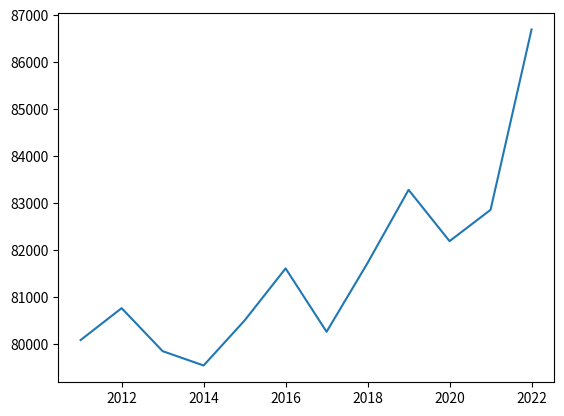

In [ ]:
plt.plot(df['年份'], df['男性'])
plt.show()

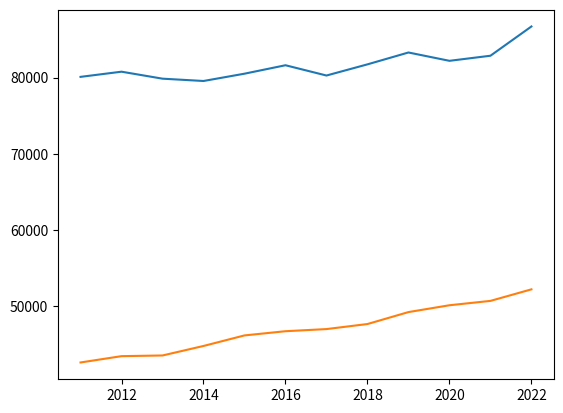

In [ ]:
#增加一個類別變量，只需要再畫一條線即可
plt.plot(df['年份'], df['男性'])
plt.plot(df['年份'], df['女性'])
plt.show()

顏色色票：https://www.wfublog.com/2015/08/css-color-code-table.html

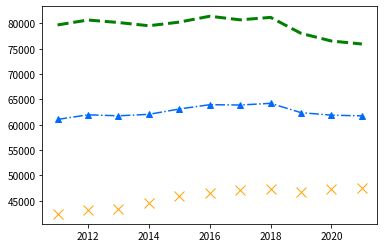

In [ ]:
#關於第三個參數
#資料點可使用'o'、'^'、'x'、'+'（單獨使用無線條）
#虛線可使用'--'、'-.'、':'
#以上可混用例如'o--'
plt.plot(df['年份'], df['男性'], '--', color='green', linewidth=3)
plt.plot(df['年份'], df['女性'], 'x', color='orange', markersize=10)
plt.plot(df['年份'], (df['男性']+df['女性'])/2, '^-.', color='#006AFF')
plt.show()

### Ｂ、長條圖 mpl.bar()或mpl.barh()
```
plt.bar(Ｘ軸序列資料, Ｙ軸序列資料)
```
* 第一個參數：資料的Ｘ值（透過改變此值來調整位置）
* 第二個參數：資料的Ｙ值
* color=顏色字串（英文詞彙、或16進位ＲＧＢ色碼）
* width=長條寬度

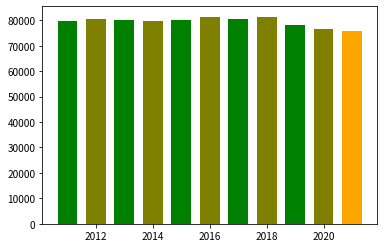

In [ ]:
#plt.bar(df['年份'], df['男性'], color=['green','olive','green','olive','green','olive','green','olive','orange'], width=0.7)
plt.bar(df['年份'], df['男性'], color=['green','olive']*5+['orange'], width=0.7)
plt.show()

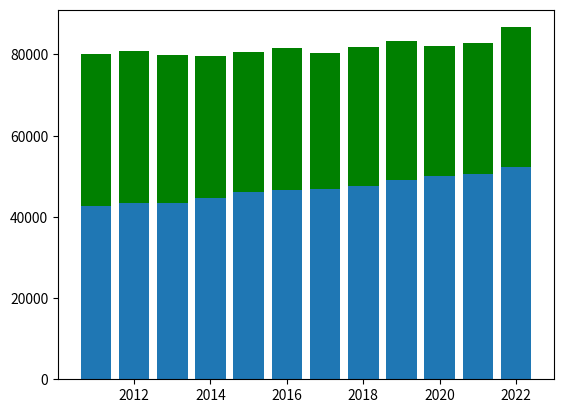

In [ ]:
plt.bar(df['年份'], df['男性'], color='green')
plt.bar(df['年份'], df['女性'])
plt.show()
#問題：兩者資料重疊了

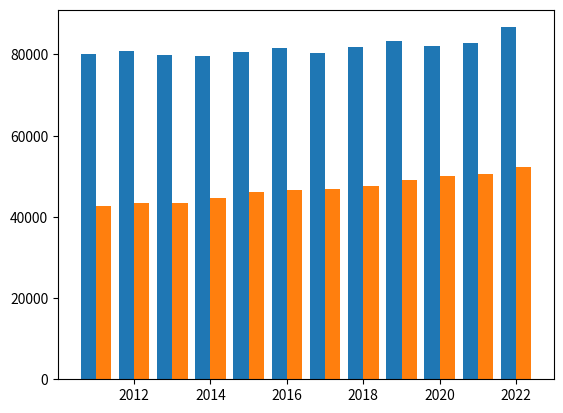

In [ ]:
#利用Ｘ軸來位移，寬度記得要減半
plt.bar(df['年份']-0.2, df['男性'], width=0.4)
plt.bar(df['年份']+0.2, df['女性'], width=0.4)
plt.show()

### Ｃ、圓餅圖 mpl.pie()
```
plt.pie(序列資料)
```
* labels=資料標籤串列
* colors=顏色串列


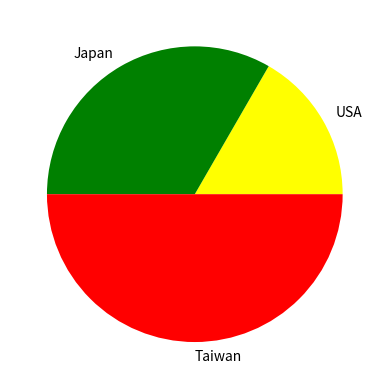

In [ ]:
data = [10, 20, 30]
tags = ["USA", "Japan", "Taiwan"]
rainbow = ["yellow", "green", "red", "blue"]

plt.pie(data, labels=tags, colors=rainbow)
plt.show()

### Ｄ、直方圖 mpl.hist()
```
plt.hist(序列資料)
```
* bins=直方數量
* colors=顏色字串


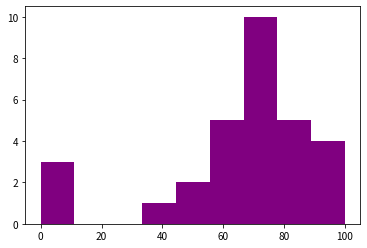

In [ ]:
data1 = [100, 73, 80, 60, 70, 50, 90, 74, 80, 70, 60, 50, 66, 90, 40, 67, 90, 68, 69, 70, 80, 60, 85, 80, 70, 60, 75, 0, 5, 10]
plt.hist(data1, bins=9, color="purple")
plt.show()

### Ｅ、盒鬚圖 mpl.boxplot()
```
plt.boxplot(序列資料)
```

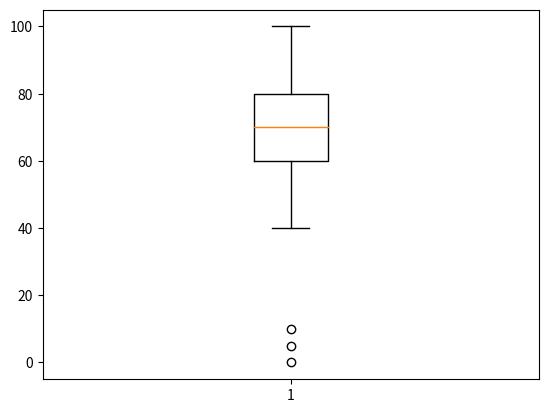

In [ ]:
data1 = [100, 73, 80, 60, 70, 50, 90, 74, 80, 70, 60, 50, 66, 90, 40, 67, 90, 68, 69, 70, 80, 60, 85, 80, 70, 60, 75, 0, 5, 10]
plt.boxplot(data1)
plt.show()

### Ｆ、散佈圖 mpl.scatter()
```
plt.scatter(Ｘ軸序列資料, Ｙ軸序列資料)
```
* 第三個參數：Ｚ軸序列資料
* 第四個參數：顏色


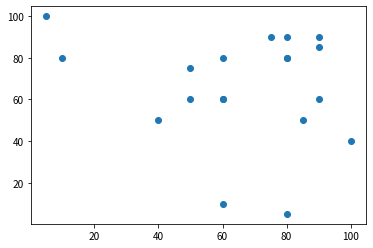

In [ ]:
dataX = [5, 10, 90, 40, 90, 80, 60, 85, 80, 60, 75, 100, 80, 60, 50, 90, 80, 60, 50]
dataY = [100, 80, 60, 50, 90, 80, 60, 50, 5, 10, 90, 40, 90, 80, 60, 85, 80, 60, 75]
plt.scatter(dataX, dataY)
plt.show()

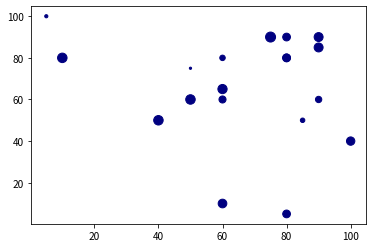

In [ ]:
dataX = [5, 10, 90, 40, 90, 80, 60, 85, 80, 60, 75, 100, 80, 60, 50, 90, 80, 60, 50]
dataY = [100, 80, 60, 50, 90, 80, 65, 50, 5, 10, 90, 40, 90, 80, 60, 85, 80, 60, 75]
dataZ = [10, 90, 40, 90, 80, 60, 85, 20, 60, 75, 100, 70, 60, 30, 90, 80, 60, 50, 5]
plt.scatter(dataX, dataY, dataZ, "navy")
plt.show()

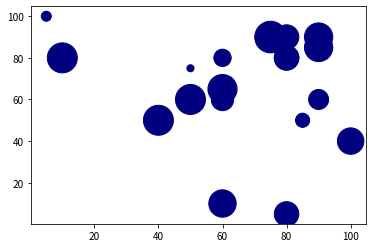

In [ ]:
df = pd.DataFrame({"X":dataX, "Y":dataY, "Z":dataZ})
plt.scatter(df["X"], df["Y"], df["Z"]*10, "navy")
plt.show()

使用cmap參數
* 色階：https://matplotlib.org/stable/tutorials/colors/colormaps.html
```
plt.scatter(X, Y, Z, 數字序列, cmap="色階")
```


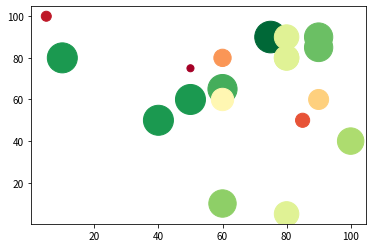

In [ ]:
df = pd.DataFrame({"X":dataX, "Y":dataY, "Z":dataZ})
plt.scatter(df["X"], df["Y"], df["Z"]*10, df["Z"], cmap="RdYlGn")
plt.show()

## Step 2 微調圖片細節

### 設定圖片大小
以下語法須在import後、繪圖前

In [ ]:
plt.rcParams["figure.figsize"] = (8, 5)

### Ａ、增加標題
```
plt.title(標題字串)
```
*   fontsize=字體大小
*   color=字體顏色


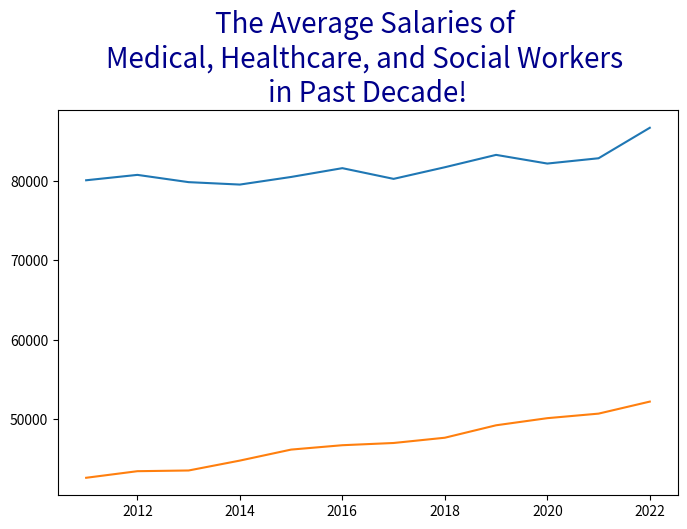

In [ ]:
plt.title('The Average Salaries of \nMedical, Healthcare, and Social Workers \nin Past Decade!', fontsize=20, color='darkblue')
plt.plot(df['年份'], df['男性'])
plt.plot(df['年份'], df['女性'])
plt.show()

### Ｂ、增加圖例
```
plt.legend()

```
*   labels=標籤，型態為字串的串列
* loc=方位，預設為'best'，也可以改成'upper left', 'upper right', 'lower left', 'lower right', 'upper center', 'lower center', 'center left', 'center right',' center'
*   bbox_to_anchor=圖例的位置改為相對統計圖，例如(1,1)代表右上角


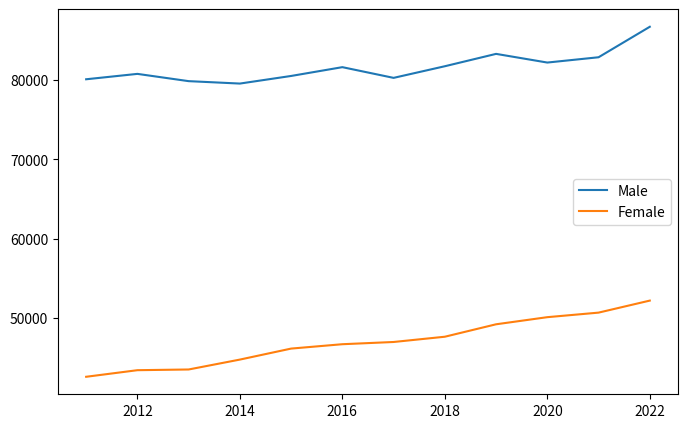

In [ ]:
plt.plot(df['年份'], df['男性'])
plt.plot(df['年份'], df['女性'])
#增加圖例
plt.legend(labels=["Male", "Female"], loc='right')
plt.show()

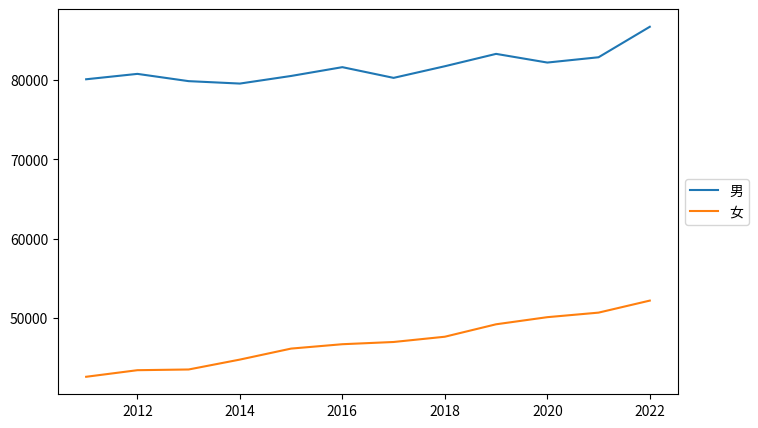

In [ ]:
plt.plot(df['年份'], df['男性'])
plt.plot(df['年份'], df['女性'])
#增加圖例在圖外
plt.legend(labels=["男", "女"], bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

### Ｃ、增加座標軸標題
```
plt.xlabel(標題字串)   #Ｘ軸標題
plt.ylabel(標題字串)   #Ｙ軸標題
```
*   其他參數：fontsize, color等文字參數也可使用


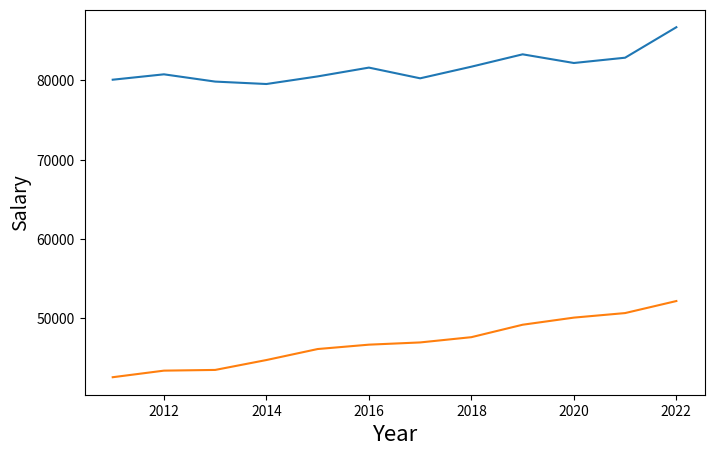

In [ ]:
plt.plot(df['年份'], df['男性'])
plt.plot(df['年份'], df['女性'])
#增加座標軸標題
plt.xlabel('Year', fontsize=16)
plt.ylabel('Salary', fontsize=14)
plt.show()

### Ｄ、調整座標軸上下界
```
plt.xlim(座標上界)   #Ｘ軸
plt.ylim(座標下界)   #Ｙ軸
```


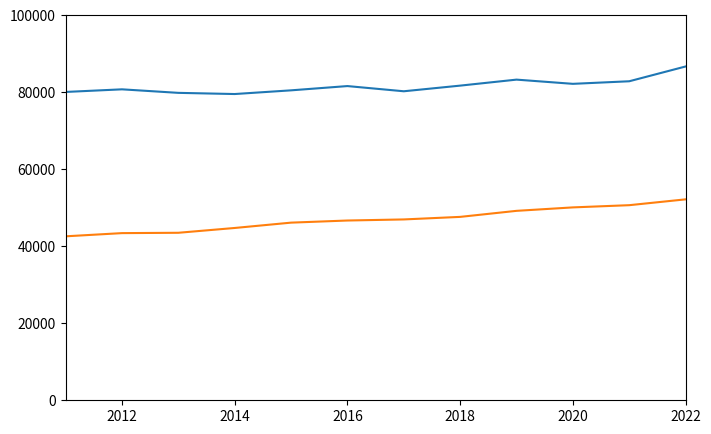

In [ ]:
plt.plot(df['年份'], df['男性'])
plt.plot(df['年份'], df['女性'])
#調整座標上下界
plt.xlim(2011, 2022)
plt.ylim(0, 100000)
plt.show()

### Ｅ、改變座標標籤
```
plt.xticks()   #Ｘ軸
plt.yticks()   #Ｙ軸
```
*   ticks=位置的串列，若為類別標籤，起始為0
*   labels=標籤內容的串列
*   其他參數：fontsize, color等文字參數也可使用


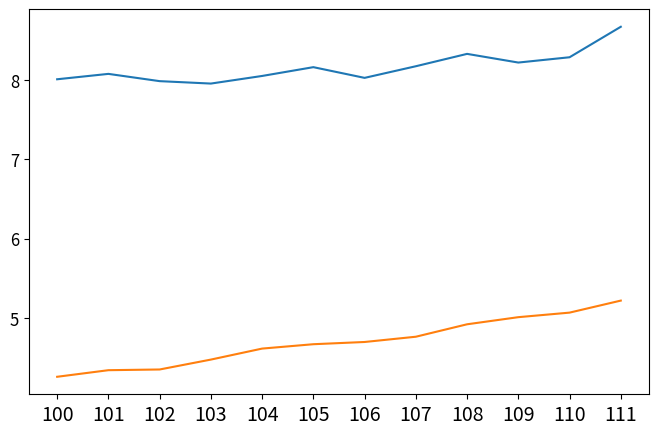

In [ ]:
plt.plot(df['年份'], df['男性']/10000)
plt.plot(df['年份'], df['女性']/10000)

#改變座標標籤
plt.xticks(ticks=range(2011, 2023), labels=range(100,112), fontsize=14)
plt.yticks(fontsize=12)

plt.show()


### Ｆ、增加線段
```
plt.hlines(Ｙ軸座標, Ｘ軸起點, Ｘ軸終點)   #水平線
plt.vlines(Ｘ軸座標, Ｙ軸起點, Ｙ軸終點)   #垂直線
```
* linestyle：線段風格 '-'、'--'、'-.'、':'
* 其他參數：color、linewidth等線段參數也可使用



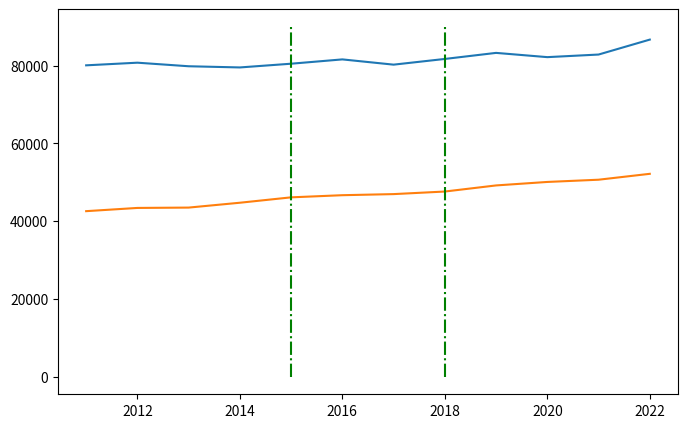

In [ ]:
plt.plot(df['年份'], df['男性'])
plt.plot(df['年份'], df['女性'])
#增加線段
plt.vlines(2018, 0, 90000, linestyle='-.', color='green')
plt.vlines(2015, 0, 90000, linestyle='-.', color='green')
plt.show()

### Ｇ、增加文字
```
plt.text(Ｘ軸座標, Ｙ軸座標, 字串)
```
*   其他參數：fontsize, color等文字參數也可使用


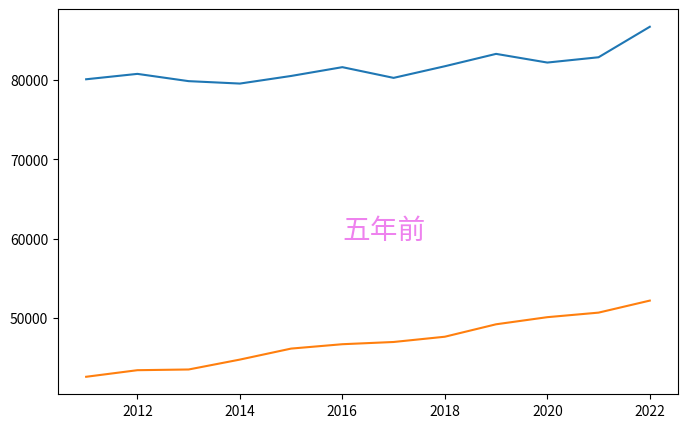

In [ ]:
plt.plot(df['年份'], df['男性'])
plt.plot(df['年份'], df['女性'])
#增加文字
plt.text(2016, 60000, "五年前", fontsize=20, color="violet")
plt.show()

## Ｑ：字太多導致存檔時超出邊界！
在存檔前增加以下語法
```
plt.tight_layout()
```




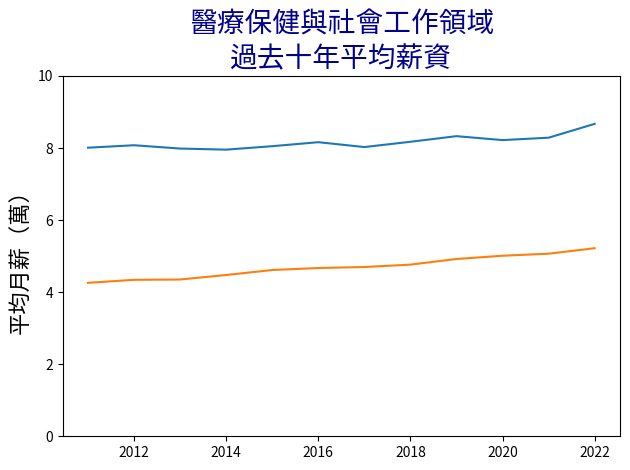

In [ ]:
plt.title('醫療保健與社會工作領域\n過去十年平均薪資', fontsize=20, color='darkblue')
plt.plot(df['年份'], df['男性']/10000)
plt.plot(df['年份'], df['女性']/10000)
plt.ylim(0, 10)
plt.ylabel("平均月薪（萬）", fontsize=16)
plt.tight_layout()
plt.savefig('mhsalary1.png', dpi=200)
plt.show()

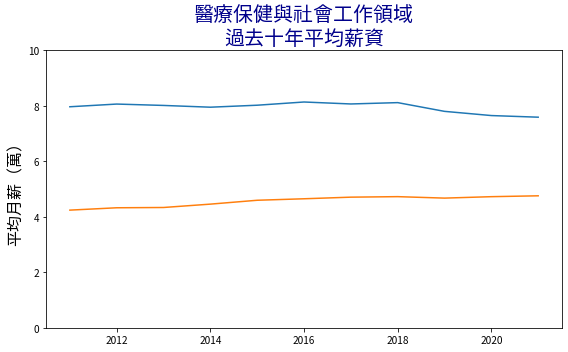

In [ ]:
plt.title('醫療保健與社會工作領域\n過去十年平均薪資', fontsize=20, color='darkblue')
plt.plot(df['年份'], df['男性']/10000)
plt.plot(df['年份'], df['女性']/10000)
plt.ylim(0, 10)
plt.ylabel("平均月薪（萬）", fontsize=16)
plt.tight_layout()
plt.savefig('mhsalary2.png', dip=200)
plt.show()

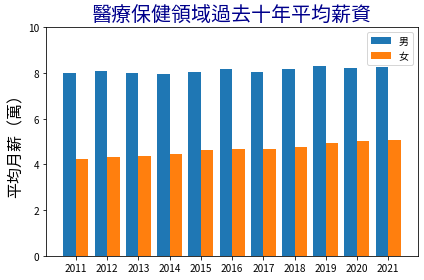

In [ ]:
plt.title('醫療保健領域過去十年平均薪資', fontsize=20, color='darkblue')
plt.bar(df['年份']-0.2, df['男性']/10000, width=0.4)
plt.bar(df['年份']+0.2, df['女性']/10000, width=0.4)
plt.ylim(0, 10)
plt.ylabel("平均月薪（萬）", fontsize=16)
plt.xticks(ticks=year, labels=year)
plt.legend(labels=["男", "女"], loc='best')
plt.tight_layout()
plt.savefig('mhsalary2.png', dip=200)
plt.show()